In [1]:
#Image classification using ANN & CNN

In [2]:
import tensorflow as tf #importing necessary libraries

In [3]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

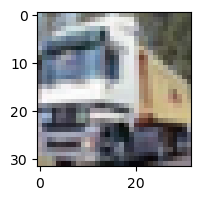

In [7]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1]) 

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)

In [10]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(X,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

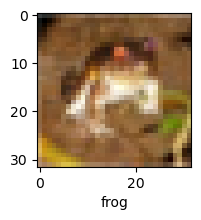

In [13]:
plot_sample(X_train,y_train,0)

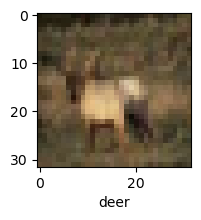

In [14]:
plot_sample(X_train,y_train,3)

In [15]:
X_train = X_train/255

In [16]:
X_test = X_test/255

In [17]:
# Aritifical Neural Network (ANN)
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000,activation ="relu"),
    layers.Dense(10,activation="sigmoid")
])
ann.compile(optimizer="SGD",
           loss= "sparse_categorical_crossentropy",
           metrics=["accuracy"])
ann.fit(X_train, y_train, epochs =5)

C:\Users\skshe\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.3041 - loss: 1.9319
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.4202 - loss: 1.6430
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.4581 - loss: 1.5418
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.4740 - loss: 1.4909
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.4992 - loss: 1.4350


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.49      0.53      1000
           1       0.57      0.68      0.62      1000
           2       0.36      0.39      0.37      1000
           3       0.37      0.26      0.31      1000
           4       0.40      0.50      0.44      1000
           5       0.40      0.36      0.38      1000
           6       0.50      0.57      0.53      1000
           7       0.65      0.45      0.53      1000
           8       0.55      0.71      0.62      1000
           9       0.58      0.51      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000



**From above accuracy is around 0.49 also ANN is not suitable for high computational size, variations and distortion,
so, it is prefered to use Convolutional Neural Networks which using feature extraction and Classification and are
robust to variations and distortion.**

In [21]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation ="relu"),
    layers.Dense(10,activation="softmax")
])

In [22]:
cnn.compile(optimizer="adam",
           loss= "sparse_categorical_crossentropy",
           metrics=["accuracy"])

In [23]:
cnn.fit(X_train,y_train,epochs =10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.3701 - loss: 1.7151
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.5726 - loss: 1.2088
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6262 - loss: 1.0572
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6582 - loss: 0.9806
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6834 - loss: 0.9079
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7009 - loss: 0.8572
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.7123 - loss: 0.8201
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.7300 - loss: 0.7730
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7429 - loss: 0.7413
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.7533 - loss: 0.7106


**an accuracy of 0.75 is obtained using CNN**

In [24]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6783 - loss: 0.9266


[0.9277846813201904, 0.6855000257492065]

In [25]:
y_pred_cnn = cnn.predict(X_test)
y_pred_cnn[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[4.36808169e-03, 5.75419144e-05, 2.75755208e-03, 9.00657058e-01,
        4.07865038e-04, 4.45903577e-02, 3.95119153e-02, 2.76008062e-03,
        4.27617645e-03, 6.13392447e-04],
       [8.29902710e-05, 8.69021635e-04, 9.50354462e-09, 4.65796546e-07,
        5.29332828e-11, 4.47638010e-10, 1.09828216e-10, 5.36289034e-11,
        9.99007165e-01, 4.03443337e-05],
       [1.01479359e-01, 3.57228797e-03, 2.25412520e-03, 2.21816474e-03,
        8.99227452e-05, 1.34805741e-05, 6.36734740e-06, 1.83319440e-04,
        8.87326777e-01, 2.85623339e-03],
       [7.87554324e-01, 1.66492141e-03, 4.81495410e-02, 1.17213828e-02,
        1.94468128e-04, 3.78703480e-05, 1.59322117e-05, 1.31077235e-04,
        1.50417730e-01, 1.12781156e-04],
       [6.44574754e-07, 1.64693251e-04, 1.29810879e-02, 2.73509603e-02,
        3.02430868e-01, 9.59198107e-04, 6.56036079e-01, 2.28043154e-05,
        4.63728102e-05, 7.23515041e-06]], dtype=float32)

In [26]:
y_test = y_test.reshape(-1)

In [27]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [28]:
y_classes = [np.argmax(element) for element in y_pred_cnn]

In [29]:
y_classes[:5]

[3, 8, 8, 0, 6]